In [7]:
from main import *
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

Вариант 7:
\begin{align}
    \frac {\partial^2{u}} {\partial{t^2}} + 2 \frac {\partial{u}} {\partial{t}}= \frac {\partial ^ 2 {u}} {\partial{x^2}} + 2 \frac {\partial{u}} {\partial{x}} - 3u, \\
U(0, t) = exp(-t) \cdot cos(2t), \\
U(\frac {\pi} {2}, t) = 0, \\
U(x, 0) = exp(-x) \cdot cos(x), \\
U_t(x, 0) = -exp(-x) \cdot cos(x)
\end{align}

Аналитическое решение:
\begin{align}
U(x, t) = exp(-t - x) \cdot cos(x) \cdot cos(2t)
\end{align}

**В данной лабораторной работе используется 3 вида аппроксимации граничных условий:**
1. двухточечная аппроксимация с первым порядком
2. трехтоточная аппроксимация со вторым порядком
3. двухточечная аппроксимация со вторым порядком

In [8]:
def __init__(self, params, equation_type):
    self.data = Data(params)
    self.h = 0
    self.tau = 0
    self.sigma = 0
    try:
        self.solve_func = getattr(self, f'{equation_type}_solver')
    except:
        raise Exception("This type does not exist")

def solve(self, N, K, T):
    self.h = self.data.l / N
    self.tau = T / K
    self.sigma = (self.tau ** 2) / (self.h ** 2)
    return self.solve_func(N, K, T)

def analyticSolve(self, N, K, T):
    self.h = self.data.l / N
    self.tau = T / K
    self.sigma = (self.tau ** 2) / (self.h ** 2)
    u = np.zeros((K, N))
    for k in range(K):
        for j in range(N):
            u[k][j] = self.data.solution(j * self.h, k * self.tau)
    return u

def calculate(self, N, K):
    u = np.zeros((K, N))

    for j in range(0, N - 1):
        x = j * self.h
        u[0][j] = self.data.psi1(x)

        if self.data.approximation == 'p1':
            u[1][j] = self.data.psi1(x) + self.data.psi2(x) * self.tau + self.data.psi1_dir2(x) * \
                        (self.tau ** 2 / 2)
        elif self.data.approximation == 'p2':
            u[1][j] = self.data.psi1(x) + self.data.psi2(x) * self.tau + \
                        (self.data.psi1_dir2(x) + self.data.b * self.data.psi1_dir1(x) +
                        self.data.c * self.data.psi1(x) + self.data.f()) * (self.tau ** 2 / 2)

    return u

def implicit_solver(self, N, K, T):
    u = self.calculate(N, K)

    a = np.zeros(N)
    b = np.zeros(N)
    c = np.zeros(N)
    d = np.zeros(N)

    for k in range(2, K):
        for j in range(1, N):
            a[j] = self.sigma
            b[j] = -(1 + 2 * self.sigma)
            c[j] = self.sigma
            d[j] = -2 * u[k - 1][j] + u[k - 2][j]

        if self.data.bound_type == 'a1p2':
            b[0] = self.data.alpha / self.h / (self.data.beta - self.data.alpha / self.h)
            c[0] = 1
            d[0] = 1 / (self.data.beta - self.data.alpha / self.h) * self.data.phi0(k * self.tau)
            a[-1] = -self.data.gamma / self.h / (self.data.delta + self.data.gamma / self.h)
            d[-1] = 1 / (self.data.delta + self.data.gamma / self.h) * self.data.phi1(k * self.tau)

        elif self.data.bound_type == 'a2p3':
            k1 = 2 * self.h * self.data.beta - 3 * self.data.alpha
            omega = self.tau ** 2 * self.data.b / (2 * self.h)
            xi = self.data.d * self.tau / 2

            b[0] = 4 * self.data.alpha - self.data.alpha / (self.sigma + omega) * \
                    (1 + xi + 2 * self.sigma - self.data.c * self.tau ** 2)
            c[0] = k1 - self.data.alpha * (omega - self.sigma) / (omega + self.sigma)
            d[0] = 2 * self.h * self.data.phi0(k * self.tau) + self.data.alpha * d[1] / (-self.sigma - omega)
            a[-1] = -self.data.gamma / (omega - self.sigma) * \
                    (1 + xi + 2 * self.sigma - self.data.c * self.tau ** 2) - 4 * self.data.gamma
            d[-1] = 2 * self.h * self.data.phi1(k * self.tau) - self.data.gamma * d[-2] / (omega - self.sigma)

        elif self.data.bound_type == 'a2p2':
            b[0] = 2 * self.data.a / self.h
            c[0] = -2 * self.data.a / self.h + self.h / self.tau ** 2 - self.data.c * self.h + \
                    -self.data.d * self.h / (2 * self.tau) + \
                    self.data.beta / self.data.alpha * (2 * self.data.a + self.data.b * self.h)
            d[0] = self.h / self.tau ** 2 * (u[k - 2][0] - 2 * u[k - 1][0]) - self.h * self.data.f() + \
                    -self.data.d * self.h / (2 * self.tau) * u[k - 2][0] + \
                    (2 * self.data.a - self.data.b * self.h) / self.data.alpha * self.data.phi0(k * self.tau)
            a[-1] = -b[0]
            d[-1] = self.h / self.tau ** 2 * (-u[k - 2][0] + 2 * u[k - 1][0]) + self.h * self.data.f() + \
                    self.data.d * self.h / (2 * self.tau) * u[k - 2][0] + \
                    (2 * self.data.a + self.data.b * self.h) / self.data.alpha * self.data.phi1(k * self.tau)

        u[k] = tma(a, b, c, d)

    return u

def _left_bound_a1p2(self, u, k, t):
    coeff = self.data.alpha / self.h
    return (-coeff * u[k - 1][1] + self.data.phi0(t)) / (self.data.beta - coeff)

def _right_bound_a1p2(self, u, k, t):
    coeff = self.data.gamma / self.h
    return (coeff * u[k - 1][-2] + self.data.phi1(t)) / (self.data.delta + coeff)

def _left_bound_a2p2(self, u, k, t):
    n = self.data.c * self.h - 2 * self.data.a / self.h - self.h / self.tau ** 2 - self.data.d * self.h / \
        (2 * self.tau) + self.data.beta / self.data.alpha * (2 * self.data.a - self.data.b * self.h)
    return 1 / n * (- 2 * self.data.a / self.h * u[k][1] +
                    self.h / self.tau ** 2 * (u[k - 2][0] - 2 * u[k - 1][0]) +
                    -self.data.d * self.h / (2 * self.tau) * u[k - 2][0] + -self.h * self.data.f() +
                    (2 * self.data.a - self.data.b * self.h) / self.data.alpha * self.data.phi0(t))

def _right_bound_a2p2(self, u, k, t):
    n = -self.data.c * self.h + 2 * self.data.a / self.h + self.h / self.tau ** 2 + self.data.d * self.h / \
        (2 * self.tau) + self.data.delta / self.data.gamma * (2 * self.data.a + self.data.b * self.h)
    return 1 / n * (2 * self.data.a / self.h * u[k][-2] +
                    self.h / self.tau ** 2 * (2 * u[k - 1][-1] - u[k - 2][-1]) +
                    self.data.d * self.h / (2 * self.tau) * u[k - 2][-1] + self.h * self.data.f() +
                    (2 * self.data.a + self.data.b * self.h) / self.data.gamma * self.data.phi1(t))

def _left_bound_a2p3(self, u, k, t):
    denom = 2 * self.h * self.data.beta - 3 * self.data.alpha
    return self.data.alpha / denom * u[k - 1][2] - 4 * self.data.alpha / denom * u[k - 1][1] + \
            2 * self.h / denom * self.data.phi0(t)

def _right_bound_a2p3(self, u, k, t):
    denom = 2 * self.h * self.data.delta + 3 * self.data.gamma
    return 4 * self.data.gamma / denom * u[k - 1][-2] - self.data.gamma / denom * u[k - 1][-3] + \
            2 * self.h / denom * self.data.phi1(t)

def explicit_solver(self, N, K, T):
    global left_bound, right_bound
    u = self.calculate(N, K)

    # for j in range(1, N - 1):
    #     u[1][j] = self.data.ps1()
    if self.data.bound_type == 'a1p2':
        left_bound = self._left_bound_a1p2
        right_bound = self._right_bound_a1p2

    elif self.data.bound_type == 'a2p2':
        left_bound = self._left_bound_a2p2
        right_bound = self._right_bound_a2p2

    elif self.data.bound_type == 'a2p3':
        left_bound = self._left_bound_a2p3
        right_bound = self._right_bound_a2p3

    for k in range(2, K):
        t = k * self.tau
        for j in range(1, N - 1):
            # u[k][j] = self.sigma * u[k - 1][j + 1] + (2 - 2 * self.sigma) * u[k - 1][j] + \
            #           self.sigma * u[k - 1][j - 1] - u[k - 2][j]
            quadr = self.tau ** 2
            tmp1 = self.sigma + self.data.b * quadr / (2 * self.h)
            tmp2 = self.sigma - self.data.b * quadr / (2 * self.h)
            u[k][j] = u[k - 1][j + 1] * tmp1 + \
                u[k - 1][j] * (-2 * self.sigma + 2 + self.data.c * quadr) + \
                u[k - 1][j - 1] * tmp2 - u[k - 2][j] + quadr * self.data.f()

        u[k][0] = left_bound(u, k, t)
        u[k][-1] = right_bound(u, k, t)

    return u

Input equation type (example: explicit)

In [9]:
equation_type = str(input())

In [10]:
N = 70
K = 764
T = 1
params = {
        'a': 1,
        'b': 2,
        'c': -3,
        'd': 2,
        'l': np.pi / 2,
        'f': lambda: 0,
        'alpha': 1,
        'beta': 0,
        'gamma': 1,
        'delta': 0,
        'psi1': lambda x: np.exp(-x) * np.cos(x),
        'psi2': lambda x: -np.exp(-x) * np.cos(x),
        'psi1_dir1': lambda x: -np.exp(-x) * np.sin(x) - np.exp(-x) * np.cos(x),
        'psi1_dir2': lambda x: 2 * np.exp(-x) * np.sin(x),
        'phi0': lambda t: np.exp(-t) * np.cos(2 * t),
        'phi1': lambda t: 0,
        'bound_type': 'a1p2',
        'approximation': 'p1',
        'solution': lambda x, t: np.exp(-t - x) * np.cos(x) * np.cos(2 * t),
    }

In [11]:
params['bound_type'] = 'a1p2'

In [12]:
solver = HyperbolicSolver(params, equation_type)

In [13]:
dict_ans = {
        'numerical': solver.solve(N, K, T).tolist(),
        'analytic': solver.analyticSolve(N, K, T).tolist()
    }

In [14]:
print("Sigma:", solver.sigma)

Sigma: 0.003402276526462098


In [15]:
def draw(dict_, N, K, T, save_file="plot.png"):
    fig = plt.figure(figsize=plt.figaspect(0.3))
    # Make data
    x = np.arange(0, np.pi / 2, np.pi / 2 / N)
    t = np.arange(0, T, T / K)
    x, t = np.meshgrid(x, t)
    z1 = np.array(dict_['numerical'])
    z2 = np.array(dict_['analytic'])

    # Plot the surface.
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    plt.title('numerical')
    ax.set_xlabel('x', fontsize=20)
    ax.set_ylabel('t', fontsize=20)
    ax.set_zlabel('u', fontsize=20)
    surf = ax.plot_surface(x, t, z1, cmap=cm.PiYG,
                    linewidth=0, antialiased=True)
    fig.colorbar(surf, shrink=0.5, aspect=15)

    ax = fig.add_subplot(1, 2, 2, projection='3d')
    ax.set_xlabel('x', fontsize=20)
    ax.set_ylabel('t', fontsize=20)
    ax.set_zlabel('u', fontsize=20)
    plt.title('analytic')
    surf = ax.plot_surface(x, t, z2, cmap=cm.PiYG,
                           linewidth=0, antialiased=True)
    # # Customize the z axis
    # ax.set_zlim(-1.01, 1.01)

    # # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=15)

    plt.savefig(save_file)
    plt.show()

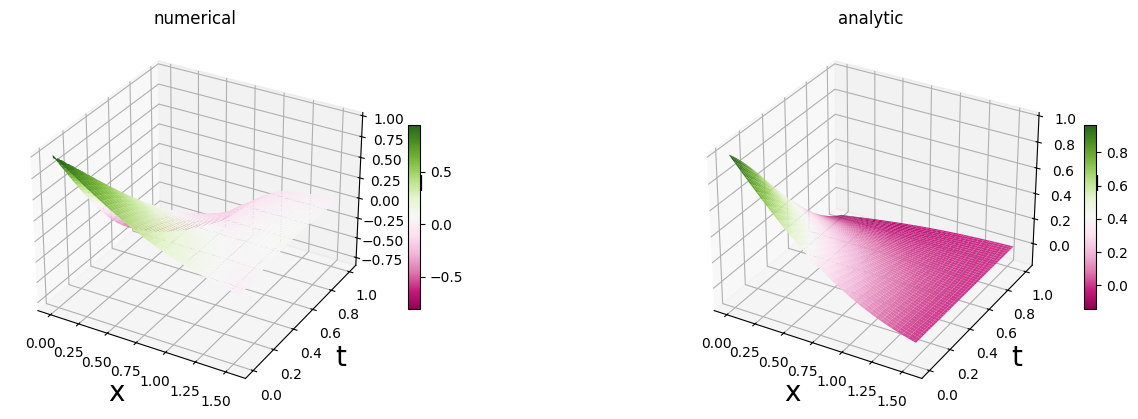

In [16]:
draw(dict_ans, N, K, T)

In [17]:
def draw_u_x(dict_, N, K, T, time, save_file="plot_u_x.png"):
    fig = plt.figure()
    x = np.arange(0, np.pi / 2, np.pi / 2 / N)
    t = np.arange(0, T, T / K)
    z1 = np.array(dict_['numerical'])
    z2 = np.array(dict_['analytic'])
    

    plt.title('U from x')
    plt.plot(x, z1[time], color='r', label='numerical')
    plt.plot(x, z2[time], color='b', label='analytic')
    plt.legend(loc='best')
    plt.ylabel('U')
    plt.xlabel('x')
    plt.savefig(save_file)
    plt.show()
    
    err = []
    error = compare_error(dict_ans)
    for i in range(len(error)):
        tmp = 0
        for j in error[i]:
            tmp += j
        err.append(tmp/len(error[i])/100)
    plt.title('Error from t')
    plt.plot(t, err, color='b', label='err')
    plt.legend(loc='best')
    plt.ylabel('Err')
    plt.xlabel('t')
    plt.savefig('err.png')
    plt.show()

Time check

In [18]:
curr_time = int(input())

ValueError: invalid literal for int() with base 10: 'explicit'

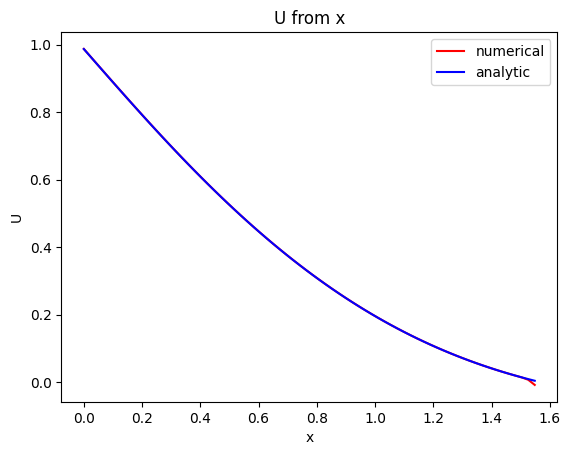

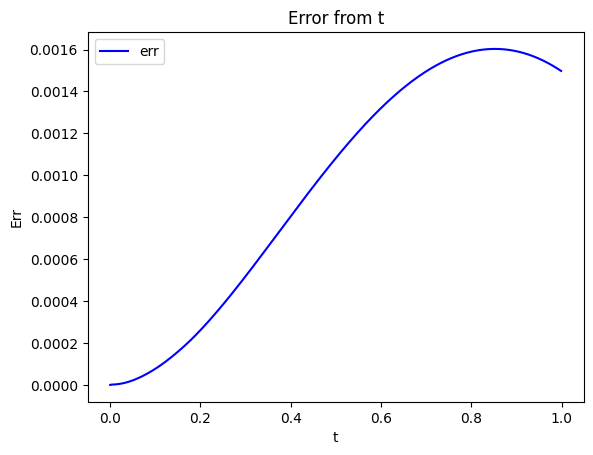

In [15]:
draw_u_x(dict_ans, N, K, T, curr_time)

In [16]:
error = compare_error(dict_ans)
avg_err = 0.0
for i in error:
    for j in i:
        avg_err += j
    avg_err /= N

First elements in error array:

In [17]:
print(error[0])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0047702677544667815]


Middle elements in error array:

In [18]:
print(error[int(K/2)])

[0.16354750614019037, 0.16354628559001544, 0.16355867753100806, 0.1635664539265091, 0.1635523446425644, 0.16350014538150087, 0.1633947730110783, 0.16322230494805362, 0.16297019089644943, 0.16262705015932483, 0.16218311428075283, 0.16162999537410358, 0.1609607146250759, 0.16017029778696418, 0.15925514439559274, 0.15821313370460616, 0.1570446454836768, 0.15575189276987006, 0.15433792163702695, 0.15280776347503822, 0.15117010095729774, 0.14943672820537054, 0.1476201032927641, 0.14573113329407864, 0.14377839114925442, 0.14176846924933145, 0.13970668850929702, 0.1375976726163916, 0.13544567650913228, 0.1332547360403458, 0.13102872559986495, 0.12877137808360742, 0.126486292042405, 0.12417693510503532, 0.12184664634946447, 0.11949863771893605, 0.11713599166525665, 0.11476164220882938, 0.1123782892764207, 0.1099880713756671, 0.10759146239171855, 0.10518401191239947, 0.10274810508743978, 0.10023597605428283, 0.09754422640541437, 0.09449739498981158, 0.09089024701623838, 0.08665011537289066, 0.0

Last elements in error array:

In [19]:
print(error[-1])

[0.16258372637029164, 0.1625842940375307, 0.1628798504468028, 0.16345290290877865, 0.16428548185619288, 0.1653591885804307, 0.16665524382621644, 0.16815453842836012, 0.16983768746198852, 0.17168508070990143, 0.17367694456232002, 0.17579338651147292, 0.17801445672981525, 0.18032016213625748, 0.18269044569902765, 0.18510499648345297, 0.18754269257698275, 0.18998031746796123, 0.19238983963965614, 0.1947336534145205, 0.19695757610785308, 0.19898346884324747, 0.20070744338046823, 0.20201393077939767, 0.20281624045071434, 0.20312151190616246, 0.2030879670269747, 0.2030116808242782, 0.20319015479867789, 0.20369980820553296, 0.20425817944266553, 0.20436593177691653, 0.20369847749880232, 0.20238316394812628, 0.20080144077120018, 0.19909694687200805, 0.19703435083431808, 0.19441788193475626, 0.19139882203163064, 0.18816333351731923, 0.1846081379167883, 0.18062095914833678, 0.17633808624472008, 0.17183787833246103, 0.1670183498921263, 0.16191495553250695, 0.15662924019141874, 0.1511005399442012, 

In [20]:
print(f'Average error in each N: {avg_err}')

Average error in each N: 0.15194907342786956


In [21]:
print(f'Average error\t\t: {avg_err / K}')

Average error		: 0.0001988862217642272


In [22]:
equation_type = str(input())

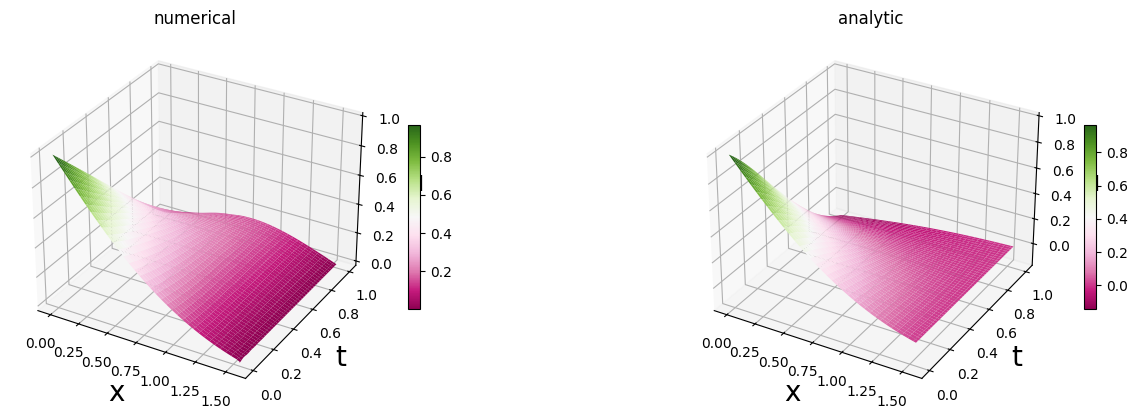

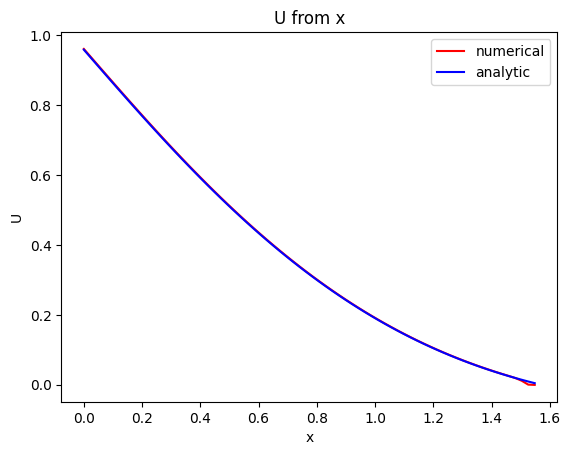

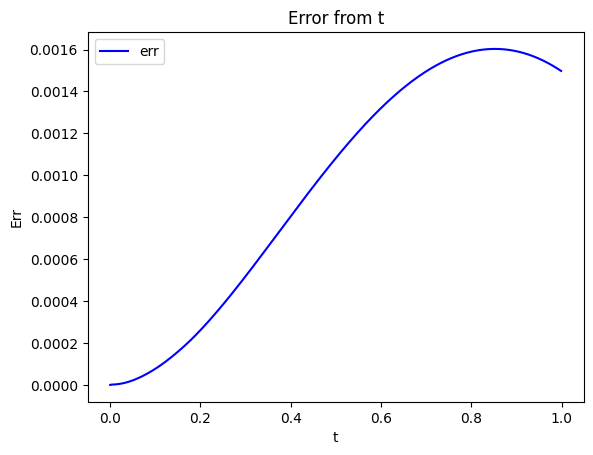

In [23]:
N = 70
K = 764
T = 1
curr_time = 30
params['bound_type'] = 'a1p2'
solver = HyperbolicSolver(params, equation_type)
dict_ans = {
        'numerical': solver.solve(N, K, T).tolist(),
        'analytic': solver.analyticSolve(N, K, T).tolist()
    }
draw(dict_ans, N, K, T)
draw_u_x(dict_ans, N, K, T, curr_time)